Accuracy: 56.76 %


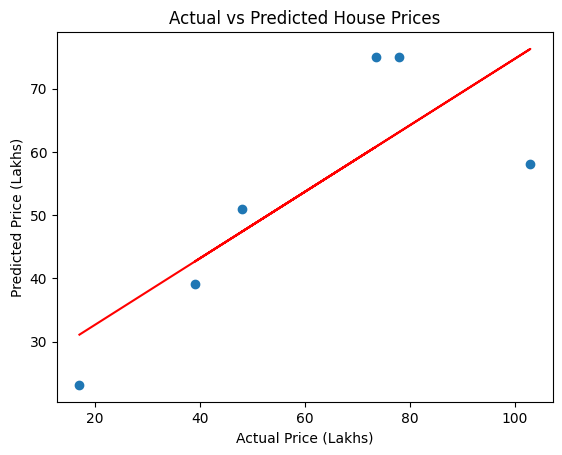


Available Locations:
['7th Phase JP Nagar' 'Akshaya Nagar' 'Balagere' 'Bannerghatta Road'
 'Begur Road' 'Bellandur' 'Chandapura' 'Electronic City Phase II'
 'Gottigere' 'Horamavu']
Enter location: HORAMAVU
Enter BHK: 3
Enter number of bathrooms: 2
Enter total sqft area: 2300

-------------------------------
Predicted House Price
-------------------------------
Location : HORAMAVU
BHK      : 3
Bath     : 2
Sqft     : 2300.0

Estimated Price: 47.96 Lakhs
-------------------------------



In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# DATA
# ---------------------------------------------------------------
data = {
    "location": [
        "7th Phase JP Nagar", "7th Phase JP Nagar", "7th Phase JP Nagar",
        "Akshaya Nagar", "Akshaya Nagar", "Akshaya Nagar",
        "Balagere", "Balagere", "Balagere",
        "Bannerghatta Road", "Bannerghatta Road", "Bannerghatta Road",
        "Begur Road", "Begur Road", "Begur Road",
        "Bellandur", "Bellandur", "Bellandur",
        "Chandapura", "Chandapura", "Chandapura",
        "Electronic City Phase II", "Electronic City Phase II", "Electronic City Phase II",
        "Gottigere", "Gottigere", "Gottigere",
        "Horamavu", "Horamavu", "Horamavu"
    ],

    "total_sqft": [
        1210.0, 1690.0, 1540.0,
        1100.0, 800.0, 950.0,
        1500.0, 1500.0, 1500.0,
        980.0, 1100.0, 600.0,
        1500.0, 1700.0, 1250.0,
        1500.0, 1500.0, 1500.0,
        900.0, 900.0, 900.0,
        1056.0, 1056.0, 1056.0,
        1000.0, 1000.0, 1000.0,
        1200.0, 1200.0, 1200.0
    ],

    "bath": [
        2, 3, 3,
        2, 1, 2,
        2, 2, 2,
        2, 2, 1,
        2, 2, 2,
        2, 2, 2,
        2, 2, 2,
        2, 2, 2,
        2, 2, 2,
        2, 2, 2
    ],

    "bhk": [
        2, 3, 3,
        2, 1, 2,
        2, 2, 2,
        2, 2, 1,
        2, 3, 2,
        3, 3, 3,
        2, 2, 2,
        2, 2, 2,
        2, 2, 2,
        2, 2, 2
    ],

    "price": [
        66.0, 85.0, 95.0,
        48.0, 35.0, 46.0,
        56.4, 59.9, 103.0,
        17.0, 16.45, 16.45,
        56.12, 50.0, 49.0,
        73.5, 75.0, 78.0,
        38.0, 40.0, 42.0,
        39.07, 39.07, 39.07,
        62.0, 64.0, 68.0,
        48.0, 50.0, 52.0
    ]
}

df = pd.DataFrame(data)

# ---------------------------------------------------------------
# FEATURES & TARGET
# ---------------------------------------------------------------
X = df[['location', 'total_sqft', 'bath', 'bhk']]
y = df['price']

# ---------------------------------------------------------------
# PIPELINE
# ---------------------------------------------------------------
column_transformer = ColumnTransformer(
    transformers=[
        ('loc_enc', OneHotEncoder(handle_unknown='ignore'), ['location'])
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('encoder', column_transformer),
    ('regressor', LinearRegression())
])

# ---------------------------------------------------------------
# TRAIN TEST SPLIT & TRAIN MODEL
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

# ---------------------------------------------------------------
# ACCURACY (TEST SCORE)
# ---------------------------------------------------------------
accuracy = model.score(X_test, y_test)
print("Accuracy:", round(accuracy * 100, 2), "%")

# ---------------------------------------------------------------
# GRAPH: ACTUAL VS PREDICTED
# ---------------------------------------------------------------
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs Predicted House Prices")

# Plot a straight trend line
coeffs = np.polyfit(y_test, y_pred, deg=1)
line = np.poly1d(coeffs)
plt.plot(y_test, line(y_test), color='red')

plt.show()

# ---------------------------------------------------------------
# USER INPUT
# ---------------------------------------------------------------
print("\nAvailable Locations:")
print(df['location'].unique())

user_location = input("Enter location: ").strip()
user_bhk = int(input("Enter BHK: "))
user_bath = int(input("Enter number of bathrooms: "))
user_sqft = float(input("Enter total sqft area: "))

# ---------------------------------------------------------------
# PREDICTION
# ---------------------------------------------------------------
user_input = pd.DataFrame({
    "location": [user_location],
    "total_sqft": [user_sqft],
    "bath": [user_bath],
    "bhk": [user_bhk]
})

predicted_price = model.predict(user_input)[0]

# ---------------------------------------------------------------
# FINAL OUTPUT
# ---------------------------------------------------------------
print("\n-------------------------------")
print("Predicted House Price")
print("-------------------------------")
print(f"Location : {user_location}")
print(f"BHK      : {user_bhk}")
print(f"Bath     : {user_bath}")
print(f"Sqft     : {user_sqft}")
print(f"\nEstimated Price: {round(predicted_price, 2)} Lakhs")
print("-------------------------------\n")
